In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd

tf.get_logger().setLevel("INFO")

2022-07-27 15:19:57.317631: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-27 15:19:57.317676: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_df = pd.read_csv("train.csv")
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="led_on")

/home/larissa15/.local/lib/python3.10/site-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)
2022-07-27 15:20:00.675344: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-27 15:20:00.675380: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-27 15:20:00.675405: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (larissa-300e5k300e5q): /proc/driver/nvidia/version does not exist
2022-07-27 15:20:00.675669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

array([[<AxesSubplot:xlabel='pir', ylabel='pir'>,
        <AxesSubplot:xlabel='ldr_1', ylabel='pir'>,
        <AxesSubplot:xlabel='ldr_2', ylabel='pir'>,
        <AxesSubplot:xlabel='temp', ylabel='pir'>,
        <AxesSubplot:xlabel='mic', ylabel='pir'>,
        <AxesSubplot:xlabel='led_on', ylabel='pir'>,
        <AxesSubplot:xlabel='timestamp', ylabel='pir'>],
       [<AxesSubplot:xlabel='pir', ylabel='ldr_1'>,
        <AxesSubplot:xlabel='ldr_1', ylabel='ldr_1'>,
        <AxesSubplot:xlabel='ldr_2', ylabel='ldr_1'>,
        <AxesSubplot:xlabel='temp', ylabel='ldr_1'>,
        <AxesSubplot:xlabel='mic', ylabel='ldr_1'>,
        <AxesSubplot:xlabel='led_on', ylabel='ldr_1'>,
        <AxesSubplot:xlabel='timestamp', ylabel='ldr_1'>],
       [<AxesSubplot:xlabel='pir', ylabel='ldr_2'>,
        <AxesSubplot:xlabel='ldr_1', ylabel='ldr_2'>,
        <AxesSubplot:xlabel='ldr_2', ylabel='ldr_2'>,
        <AxesSubplot:xlabel='temp', ylabel='ldr_2'>,
        <AxesSubplot:xlabel='mic', ylabel='

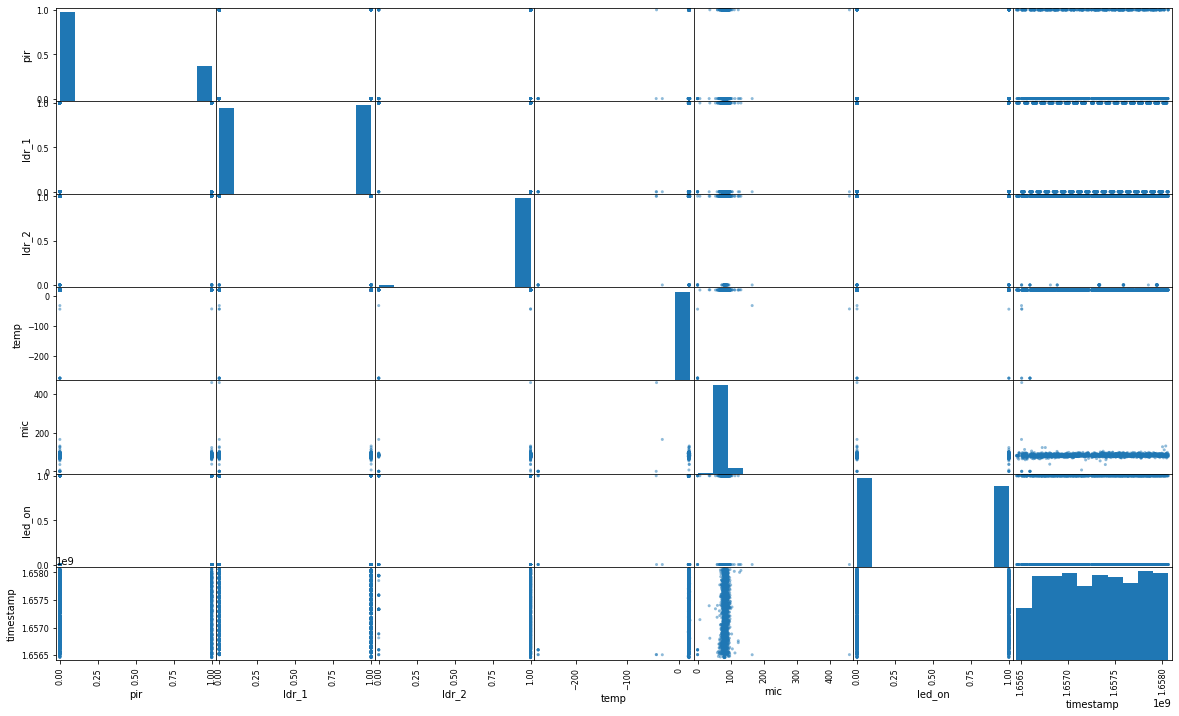

In [3]:
pd.plotting.scatter_matrix(train_df, figsize=(20, 12))

In [4]:
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmpuc42z8kw as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.537474. Found 2033 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpuc42z8kw/model/ with prefix 27011f16cb6e49c4


Model trained in 0:00:01.270831
Compiling model...


[INFO abstract_model.cc:1248] Engine "RandomForestOptPred" built
[INFO kernel.cc:1022] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [5]:
test_df = pd.read_csv("test.csv")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="led_on")

/home/larissa15/.local/lib/python3.10/site-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)


In [6]:
model.compile(metrics=["accuracy"])
print(model.evaluate(test_ds))

1/1 [==============================] - 0s 455ms/step - loss: 0.0000e+00 - accuracy: 0.4990
[0.0, 0.4990176856517792]


In [7]:
plot_html = tfdf.model_plotter.plot_model(model, tree_idx=0)

file = open("random_forest.html", "w")
file.write(plot_html)
file.close()